# Data Preprocessing

- Import the data
- Get the description of the data
- Decrease the dimension of the data
    - Near Zero Variance
    - PCA
    

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_act_1=pd.read_csv('../data/TrainingSet/ACT1_competition_training.csv')
train_act_1.head()

,MOLECULE,Act,D_3,D_4,D_5,D_6,D_7,D_8,D_9,D_11,...,D_11061,D_11064,D_11065,D_11066,D_11067,D_11068,D_11070,D_11074,D_11076,D_11078
0,ACT1_M_80,6.0179,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ACT1_M_189,4.3003,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ACT1_M_190,5.2697,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ACT1_M_402,6.1797,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ACT1_M_659,4.3003,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Summary

In [3]:
train_act_1.describe()

,Act,D_3,D_4,D_5,D_6,D_7,D_8,D_9,D_11,D_15,...,D_11061,D_11064,D_11065,D_11066,D_11067,D_11068,D_11070,D_11074,D_11076,D_11078
count,37241.000000,37241.000000,37241.000000,37241.000000,37241.000000,37241.000000,37241.000000,37241.000000,37241.000000,37241.000000,...,37241.000000,37241.000000,37241.000000,37241.000000,37241.000000,37241.000000,37241.000000,37241.000000,37241.000000,37241.000000
mean,4.690458,0.000081,0.000054,0.000430,0.000107,0.000027,0.000081,0.000242,0.000054,0.000027,...,0.000027,0.000027,0.000081,0.000215,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027
std,0.648661,0.015546,0.010364,0.020723,0.010363,0.005182,0.008975,0.015544,0.007328,0.005182,...,0.005182,0.005182,0.008975,0.014655,0.005182,0.005182,0.005182,0.005182,0.005182,0.005182
min,4.300300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.300300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.300300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.903300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.134000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Check Missing Values

In [4]:
#check missing values
columns = train_act_1.columns
percent_missing = train_act_1.isnull().sum() * 100 / len(train_act_1)
missing_value_train_act_1 = pd.DataFrame({'column_name': columns, 'percent_missing': percent_missing})

missing_value_train_act_1.loc[missing_value_train_act_1['percent_missing'] != 0.0]
# no missing values

,column_name,percent_missing


## Examine the Distribution of the Target(Act) Column
The target is what we are asked to predict: the activity value for each molecule/data set combination in the test set. Note that these are raw activity values and different data sets can have activity measured in different units.

To keep predictions for molecules unique to each data set, a data set identifier has been prepended to each molecule ID (e.g., "ACT1_" or "ACT8_").

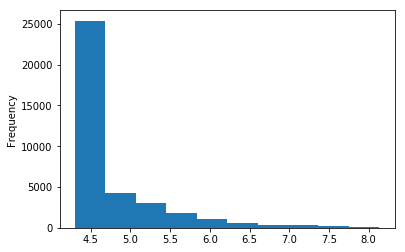

In [5]:
train_act_1['Act'].astype(float).plot.hist()

## Split Training and Test Data

In [6]:
#drop the second column "Act"
X=train_act_1.iloc[:, 2: ]#All features except 'Molecule' and 'Act'
Y=train_act_1['Act']#Y is what we want to predict 

In [7]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)
print ('Number of samples in training data:',len(x_train))
print ('Number of samples in test data:',len(x_test))

Number of samples in training data: 29792
Number of samples in test data: 7449


## Examine the Distribution of the Target after Spliting
Since the distribution is the same, the training test is the unbiased representation of the original dataset.

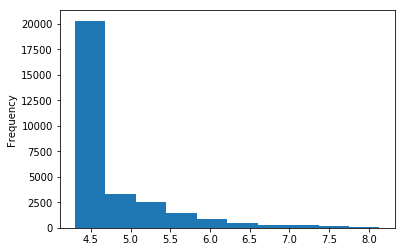

In [8]:
y_train.astype(float).plot.hist()

## Near Zero Variance

In [9]:
# near zero variance function
def remove_feat_constants(data_frame,threshold):
    # Remove feature vectors containing one unique value,
    # because such features do not have predictive value.
    n_features_originally = data_frame.shape[1]
    selector = VarianceThreshold(threshold)
    selector.fit(data_frame)
    # Get the indices of zero variance feats
    feat_ix_keep = selector.get_support(indices=True)
    orig_feat_ix = np.arange(data_frame.columns.size)
    feat_ix_delete = np.delete(orig_feat_ix, feat_ix_keep)
    # Delete zero variance feats from the original pandas data frame
    data_frame = data_frame.drop(labels=data_frame.columns[feat_ix_delete],
                                 axis=1)
    var = sum(data_frame.var())
    n_features_deleted = feat_ix_delete.size
    n_features_leftover = n_features_originally - n_features_deleted
    #print("  - Deleted %s / %s features (~= %.1f %%)" % (
        #n_features_deleted, n_features_originally,
        #100.0 * (np.float(n_features_deleted) / n_features_originally)))
    return data_frame,var,n_features_leftover

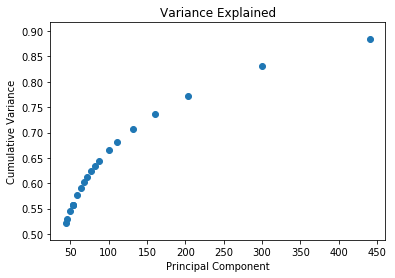

In [10]:
#Create Skree plot
var_t=sum(train_act_1.var())
var_percent_list=[]
n_features_left_list = []
for i in np.linspace(1,15,20):
    _, var_df_1, n_features_left = remove_feat_constants(x_train,i)
    var_percent_list.append(var_df_1/var_t)
    n_features_left_list.append(n_features_left)

plt.scatter(n_features_left_list,var_percent_list)
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance')
plt.title('Variance Explained')
plt.show()

If using 441 features, the cumulative variance reaches 90%. Thus, the 450 features can be a appropriate representation of the original dataset. 

In [11]:
train_act_1_450=remove_feat_constants(x_train,1)[0]
train_act_1_450['Act']=y_train
train_act_1_450.to_csv('ACT1_train_450.csv')

## PCA

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [13]:
# PCA without standardizing X
num_features = 150
pca_150 = PCA(n_components=num_features)
principal_components_150 = pca_150.fit(X)
variance_150 = np.cumsum(np.round(principal_components_150.explained_variance_ratio_, decimals=3)*100)

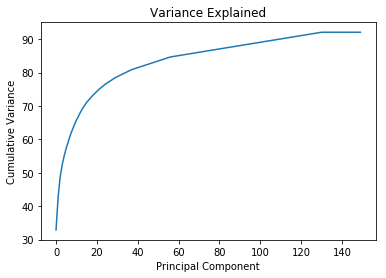

In [14]:
plt.plot(range(num_features), variance_150)
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance')
plt.title('Variance Explained')
plt.show()

## Correlation Heatmap

In [16]:
# Remove features if the variance is below 1
train_act_1_corr = remove_feat_constants(train_act_1_450,1)[0]

In [17]:
train_act_1_corr['Act']=train_act_1['Act']

In [18]:
# Find correlations with the target and sort
correlations = train_act_1_corr.corr()['Act'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 D_1114    0.150538
D_462     0.155963
D_506     0.159412
D_520     0.160163
D_834     0.163638
D_516     0.165039
D_519     0.177398
D_5524    0.187719
D_468     0.188489
D_2466    0.190733
D_518     0.193983
D_517     0.195256
D_4861    0.202868
D_4849    0.264075
Act       1.000000
Name: Act, dtype: float64

Most Negative Correlations:
 D_2129   -0.159339
D_2135   -0.158269
D_2136   -0.154638
D_2134   -0.148749
D_2138   -0.144842
D_2137   -0.141777
D_2133   -0.140471
D_2132   -0.139734
D_2131   -0.137044
D_2130   -0.134398
D_2139   -0.134321
D_2140   -0.129671
D_2142   -0.129231
D_2141   -0.127414
D_1217   -0.125435
Name: Act, dtype: float64


In [19]:
# Extract the features with highest variance and absolute correlation
ext_data = train_act_1_corr[['Act', 'D_4849', 'D_4861', 'D_517', 'D_518','D_2466','D_468']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,Act,D_4849,D_4861,D_517,D_518,D_2466,D_468
Act,1.000000,0.264075,0.202868,0.195256,0.193983,0.190733,0.188489
D_4849,0.264075,1.000000,0.257138,0.059236,0.025991,0.709478,-0.007737
D_4861,0.202868,0.257138,1.000000,0.303356,0.302454,0.184854,0.121967
D_517,0.195256,0.059236,0.303356,1.000000,0.757377,0.018066,0.277197
D_518,0.193983,0.025991,0.302454,0.757377,1.000000,-0.013446,0.256572
D_2466,0.190733,0.709478,0.184854,0.018066,-0.013446,1.000000,0.070696
D_468,0.188489,-0.007737,0.121967,0.277197,0.256572,0.070696,1.000000


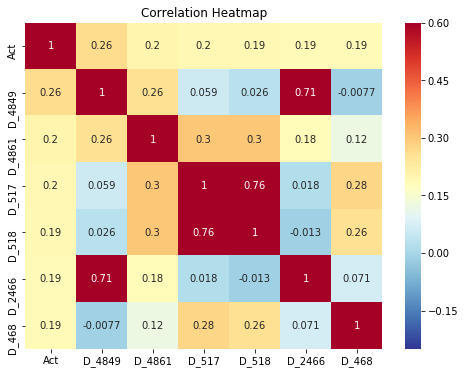

In [20]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');